Objective:
    Data Cleansing,
    Aggregate Data into country / year, 
    Aggregate to one investment line, not by type of investment,
    Output data as csv 

In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
# Read excel file into a pandas dataframe
df = pd.read_excel ('Resources/InvestmentData.xlsx') 
df.head()

,Recipient Country/Area,ISO-code,Region,Project,Year,Investor,Technology,Asset Class,Amount (USD million),Source
0,Afghanistan,AFG,Asia,"ADA, MICRO HYDRO POWER",2000,Others,Renewable Hydropower,Grant,0.022474,2000-01 OECD Credit Report System (CRS) Database
1,Afghanistan,AFG,Asia,Afghanistan Reconstruction Trust Fund,2017,Others,Multiple renewables*,Grant,3.028126,2017 OECD Credit Report System (CRS) Database
2,Afghanistan,AFG,Asia,Afghanistan: Emergency National Solidarity Pro...,2003,WBG,Multiple renewables*,Grant,22.649842,2002-03 OECD Credit Report System (CRS) Database
3,Afghanistan,AFG,Asia,Afghanistan: Emergency National Solidarity Pro...,2005,WBG,Multiple renewables*,Grant,5.999401,2004-05 OECD Credit Report System (CRS) Database
4,Afghanistan,AFG,Asia,Afghanistan: Emergency National Solidarity Pro...,2006,WBG,Multiple renewables*,Grant,8.302498,2006 OECD Credit Report System (CRS) Database


In [3]:
df.isnull().any()

Recipient Country/Area    False
ISO-code                  False
Region                    False
Project                    True
Year                      False
Investor                  False
Technology                False
Asset Class               False
Amount (USD million)      False
Source                    False
dtype: bool

In [4]:
df.count()

Recipient Country/Area    9275
ISO-code                  9275
Region                    9275
Project                   9023
Year                      9275
Investor                  9275
Technology                9275
Asset Class               9275
Amount (USD million)      9275
Source                    9275
dtype: int64

In [5]:
df.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
9270    False
9271    False
9272    False
9273    False
9274    False
Length: 9275, dtype: bool

In [6]:
df[df.isnull().any(axis=1)]
#didn't drop any NaN, because it is fine if we don't know the project name, as long there is an amount available is what we care about. 

,Recipient Country/Area,ISO-code,Region,Project,Year,Investor,Technology,Asset Class,Amount (USD million),Source
187,Argentina,ARG,South America,NaN,2004,JICA,Multiple renewables*,Grant,0.016106,2004-05 OECD Credit Report System (CRS) Database
188,Argentina,ARG,South America,NaN,2005,JICA,Multiple renewables*,Grant,0.002169,2004-05 OECD Credit Report System (CRS) Database
189,Argentina,ARG,South America,NaN,2017,IADB,Multiple renewables*,Other Official Flows (non Export Credit),60.969477,2017 OECD Credit Report System (CRS) Database
190,Argentina,ARG,South America,NaN,2017,IADB,Wind energy,Other Official Flows (non Export Credit),49.168933,2017 OECD Credit Report System (CRS) Database
282,Armenia,ARM,Eurasia,NaN,2001,Others,Renewable Hydropower,Grant,0.342560,2000-01 OECD Credit Report System (CRS) Database
...,...,...,...,...,...,...,...,...,...,...
9188,Zambia,ZMB,Africa,NaN,2006,Others,Solar energy,Grant,0.014464,2006 OECD Credit Report System (CRS) Database
9189,Zambia,ZMB,Africa,NaN,2014,AfDB,Renewable Hydropower,Other Official Flows (non Export Credit),32.882806,2014 OECD Credit Report System (CRS) Database
9190,Zambia,ZMB,Africa,NaN,2017,WBG,Solar energy,Loan,8.078456,2017 OECD Credit Report System (CRS) Database
9259,Zimbabwe,ZWE,Africa,NaN,2000,Others,Multiple renewables*,Grant,0.034433,2000-01 OECD Credit Report System (CRS) Database


In [7]:
df.dtypes

Recipient Country/Area     object
ISO-code                   object
Region                     object
Project                    object
Year                        int64
Investor                   object
Technology                 object
Asset Class                object
Amount (USD million)      float64
Source                     object
dtype: object

In [8]:
df.to_csv('Resources/InvestmentData.csv')

In [9]:
df.columns

Index(['Recipient Country/Area', 'ISO-code', 'Region', 'Project', 'Year',
       'Investor', 'Technology', 'Asset Class', 'Amount (USD million)',
       'Source'],
      dtype='object')

In [10]:
df.drop(columns = {'Project','Investor','Source'}, inplace=True)

In [11]:
df

,Recipient Country/Area,ISO-code,Region,Year,Technology,Asset Class,Amount (USD million)
0,Afghanistan,AFG,Asia,2000,Renewable Hydropower,Grant,0.022474
1,Afghanistan,AFG,Asia,2017,Multiple renewables*,Grant,3.028126
2,Afghanistan,AFG,Asia,2003,Multiple renewables*,Grant,22.649842
3,Afghanistan,AFG,Asia,2005,Multiple renewables*,Grant,5.999401
4,Afghanistan,AFG,Asia,2006,Multiple renewables*,Grant,8.302498
...,...,...,...,...,...,...,...
9270,Zimbabwe,ZWE,Africa,2005,Solar energy,Grant,0.469651
9271,Zimbabwe,ZWE,Africa,2016,Multiple renewables*,Grant,0.007757
9272,Zimbabwe,ZWE,Africa,2017,Multiple renewables*,Grant,0.009594
9273,Zimbabwe,ZWE,Africa,2011,Solar energy,Grant,1.019630


In [12]:
Countries = ["Austria","Belgium","Bulgaria",
             "Croatia","Cyprus","Czech Republic","Denmark","Estonia","Finland","France","Germany","Greece","Hungary","Ireland",
      "Italy","Latvia","Lithuania","Luxembourg","Malta","Netherlands","Poland","Portugal","Romania","Slovakia","Slovenia","Spain","Sweden","USA","UK","China"]

In [30]:
Countries_df = df[df['Recipient Country/Area'].isin(Countries)]

In [31]:
Countries_df

,Recipient Country/Area,ISO-code,Region,Year,Technology,Asset Class,Amount (USD million)
332,Austria,AUT,Europe,2011,Wind energy,Loan,234.460118
333,Austria,AUT,Europe,2016,Wind energy,Loan,42.300000
334,Austria,AUT,Europe,2013,Wind energy,Loan,32.165520
335,Austria,AUT,Europe,2014,Wind energy,Loan,44.507679
336,Austria,AUT,Europe,2015,Wind energy,Loan,27.873516
...,...,...,...,...,...,...,...
8967,USA,USA,North America,2013,Other renewable energy,Equity Investment,35.028376
8968,USA,USA,North America,2010,Wind energy,Equity Investment,54.040354
8969,USA,USA,North America,2012,Wind energy,Equity Investment,7.523046
8970,USA,USA,North America,2012,Wind energy,Loan,13.595866


In [32]:
Countries_df['Region'].loc[Countries_df['Recipient Country/Area'] == 'UK'] = 'Great Britain'

/Users/ginacanales/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/ginacanales/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


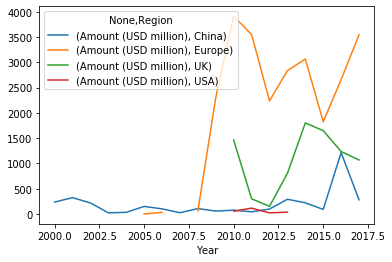

In [38]:

sum_countries = Countries_df.replace({'Asia':'China', "North America":'USA', "Great Britain":'UK'}).groupby(['Region','Year']).sum()
# sum_countries = sum_countries.rename_axis(index={'Asia':'China'})
# sum_countries.reset_index()
sum_countries.unstack(level=0).plot.line(subplots=False)

In [19]:
#Use GroupBy in order to aggregate the data according to the values in the country / year
df_countries = df.groupby(['Region','Year']).sum()
df_countries.reset_index()


,Region,Year,Amount (USD million)
0,Africa,2000,80.328594
1,Africa,2001,139.721516
2,Africa,2002,165.213536
3,Africa,2003,2009.838366
4,Africa,2004,381.288479
...,...,...,...
173,South America,2013,5064.495953
174,South America,2014,8687.363375
175,South America,2015,3454.472059
176,South America,2016,5381.308382
